# @**CodeClause Project : Uber Data Analysis (Visualization)**

## **Summary To Explain Project (Keypoints)**



*   Import Modules
*   Load Dataset
*   Data Preparation
*   Visualization
      1.   Number of trips by hour
      2.   Number of trips by month
      3.   Analysis of Week Day and Running Day
      4.   Ratio of the increase from August to September
      5.   Number of trips by weekday
      6.   Lowest number of trips by weekday
      7.   Trips Ratio Working Days and Weekends
      8.   Number of trips by day
      9.   Number of trips by hour and month
      10.   Trips by Hour and Weekday





### 1. Import Modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 2. Load Dataset

In [2]:
#Load the datasets
try:
    df_apr14=pd.read_csv("/content/drive/MyDrive/MyDataSet/Uber_Visialization/uber-raw-data-apr14.csv",error_bad_lines=False,engine="python")
    df_may14=pd.read_csv("/content/drive/MyDrive/MyDataSet/Uber_Visialization/uber-raw-data-may14.csv",error_bad_lines=False,engine="python")
    df_jun14=pd.read_csv("/content/drive/MyDrive/MyDataSet/Uber_Visialization/uber-raw-data-jun14.csv",error_bad_lines=False,engine="python")
    df_jul14=pd.read_csv("/content/drive/MyDrive/MyDataSet/Uber_Visialization/uber-raw-data-jul14.csv",error_bad_lines=False,engine="python")
    df_aug14=pd.read_csv("/content/drive/MyDrive/MyDataSet/Uber_Visialization/uber-raw-data-aug14.csv",error_bad_lines=False,engine="python")
    df_sep14=pd.read_csv("/content/drive/MyDrive/MyDataSet/Uber_Visialization/uber-raw-data-sep14.csv",error_bad_lines=False,engine="python")
except pd.errors.ParserError as e:
    print("Error occurred while parsing CSV:", e)

#Merge the dataframes into one

df = df_apr14.append([df_may14,df_jun14,df_jul14,df_aug14,df_sep14], ignore_index=True)

<ipython-input-2-11b64f844646>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_apr14=pd.read_csv("/content/drive/MyDrive/MyDataSet/Uber_Visialization/uber-raw-data-apr14.csv",error_bad_lines=False,engine="python")
Skipping line 68535: unexpected end of data
<ipython-input-2-11b64f844646>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_may14=pd.read_csv("/content/drive/MyDrive/MyDataSet/Uber_Visialization/uber-raw-data-may14.csv",error_bad_lines=False,engine="python")
Skipping line 91516: unexpected end of data
<ipython-input-2-11b64f844646>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_jun14=pd.read_csv("/content/drive/MyDrive/MyDataSet/Uber_Visialization/uber-raw-data-jun14.csv",error_bad_li

### 3. Data Preparation

In [3]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
df.shape

(434329, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434329 entries, 0 to 434328
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  434329 non-null  object 
 1   Lat        434329 non-null  float64
 2   Lon        434329 non-null  float64
 3   Base       434329 non-null  object 
dtypes: float64(2), object(2)
memory usage: 13.3+ MB


In [6]:
df.describe()

,Lat,Lon
count,434329.000000,434329.000000
mean,40.741484,-73.975492
std,0.042399,0.061789
min,39.656900,-74.703900
25%,40.723500,-73.997500
50%,40.744700,-73.983800
75%,40.762500,-73.968100
max,41.373000,-72.299900


In [7]:
#Renaming the Date/Time Colomn
df = df.rename(columns={'Date/Time': 'Date_time'})

#Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

#Adding usufull colomns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute
df['weekno']=df['Date_time'].dt.weekofyear - 13

<ipython-input-7-13cce4626a62>:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekno']=df['Date_time'].dt.weekofyear - 13


In [8]:
df.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute,weekno
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33,1


In [9]:
df.isnull().sum()

Date_time    0
Lat          0
Lon          0
Base         0
Month        0
Weekday      0
Day          0
Hour         0
Minute       0
weekno       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434329 entries, 0 to 434328
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date_time  434329 non-null  datetime64[ns]
 1   Lat        434329 non-null  float64       
 2   Lon        434329 non-null  float64       
 3   Base       434329 non-null  object        
 4   Month      434329 non-null  object        
 5   Weekday    434329 non-null  object        
 6   Day        434329 non-null  int64         
 7   Hour       434329 non-null  int64         
 8   Minute     434329 non-null  int64         
 9   weekno     434329 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 33.1+ MB


In [11]:
df.describe(include = 'all')

<ipython-input-11-74aa2f970831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute,weekno
count,434329,434329.000000,434329.000000,434329,434329,434329,434329.000000,434329.000000,434329.000000,434329.000000
unique,147306,NaN,NaN,2,6,7,NaN,NaN,NaN,NaN
top,2014-07-02 18:26:00,NaN,NaN,B02598,May,Tuesday,NaN,NaN,NaN,NaN
freq,33,NaN,NaN,228656,91514,72549,NaN,NaN,NaN,NaN
first,2014-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2014-09-30 22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,40.741484,-73.975492,NaN,NaN,NaN,9.018081,14.170981,29.407636,12.415837
std,NaN,0.042399,0.061789,NaN,NaN,NaN,8.631915,5.747129,17.320751,7.508438
min,NaN,39.656900,-74.703900,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,NaN,40.723500,-73.997500,NaN,NaN,NaN,3.000000,10.000000,14.000000,6.000000


## 4 --------- Visualization ----------

### 4.1 Number of trips by hour

In [12]:
df_hour_grouped = df.groupby(['Hour']).count()
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 
df_hour.head()

,Number_of_trips
Hour,
0,8924
1,5381
2,3584
3,4144
4,4750


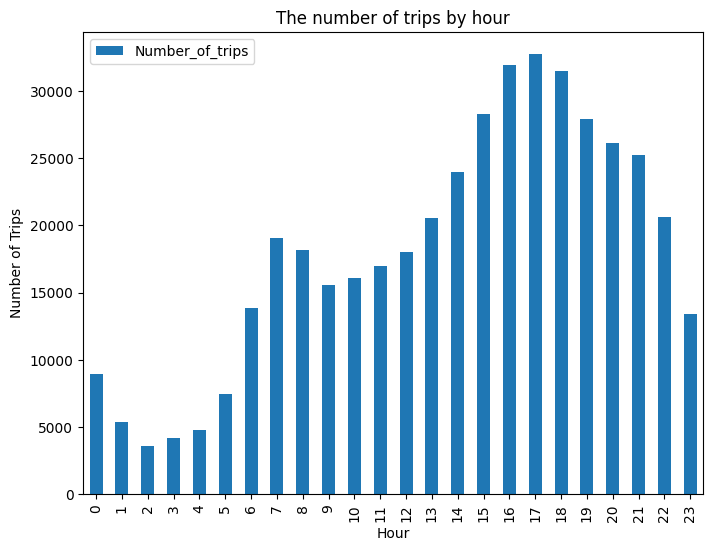

In [13]:
df_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of Trips')
plt.title('The number of trips by hour')
plt.show()

### 4.2 Number of trips by month

In [14]:
df_month_grouped = df.groupby(['Month'], sort=False).count()
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index) 
df_month

,Number_of_trips
Month,
April,68533
May,91514
June,68620
July,68467
August,68614
September,68581


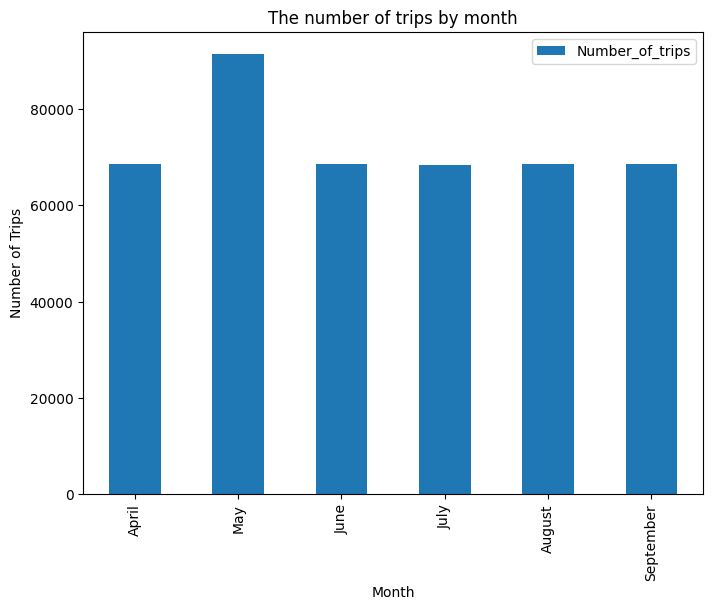

In [15]:
df_month.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of Trips')
plt.title('The number of trips by month')
plt.show()

### 4.3 Analysis of Week Day and Running Day

In [16]:
week_day=pd.DataFrame(df['Weekday'].value_counts())

week_day['day_type']=['wd','wd','wd','wd','we','wd','we']

In [17]:
pie=week_day.groupby('day_type').sum()
pie.iloc[0,0]=pie.iloc[0,0]/5
pie.iloc[1,0]=pie.iloc[1,0]/2
pie

,Weekday
day_type,
wd,67315
we,48877


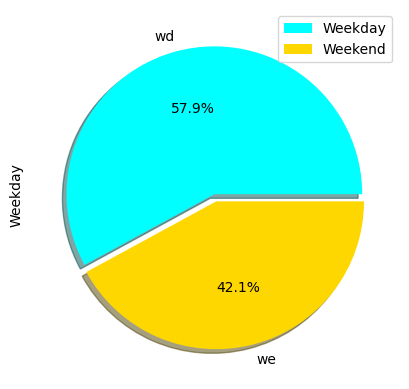

In [18]:
explode=[0,0.05]
colors=['cyan','gold']
labels=['Weekday','Weekend']
pie.plot.pie(autopct = '%1.1f%%',shadow=True,subplots=True,
        colors=colors,explode=explode)
plt.legend(labels=labels)
plt.show()

### 4.4 Ratio of the increase from August to September

In [19]:
number_of_trips_may = df_month.loc['May'].values
number_of_trips_sep = df_month.loc['September'].values

ratio_month = (((number_of_trips_may - number_of_trips_sep) / number_of_trips_may) * 100)[0]
ratio_month = round(ratio_month)

print('The ratio of the increase from August to September is {} %.'.format(ratio_month))

The ratio of the increase from August to September is 25 %.


### 4.5 Number of trips by weekday

In [20]:
df_weekday_grouped = df.groupby(['Weekday'], sort = False).count()
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index) 
df_weekday

,Number_of_trips
Weekday,
Tuesday,72549
Wednesday,70827
Thursday,71312
Friday,68895
Saturday,52992
Sunday,44345
Monday,53409


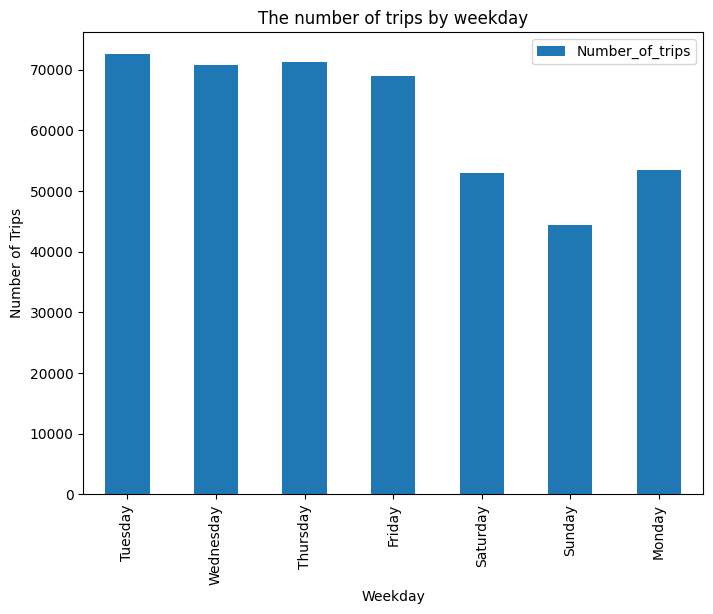

In [21]:
df_weekday.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of Trips')
plt.title('The number of trips by weekday')
plt.show()

### 4.6 Lowest number of trips by weekday

In [22]:
min_number_of_trips_weekday = min(df_weekday['Number_of_trips'])
min_weekday = df_weekday[df_weekday['Number_of_trips'] == min_number_of_trips_weekday].index[0]
print('The lowest number of trips by weekday is {} trip, that corresponds to {}.'.format(min_number_of_trips_weekday, min_weekday))

The lowest number of trips by weekday is 44345 trip, that corresponds to Sunday.


### 4.7 Trips Ratio Working Days and Weekends

In [23]:
mean_number_of_trips_weekend = ((df_weekday.loc['Saturday'] + df_weekday.loc['Sunday']) / 2).values
mean_number_of_trips_workday = (((df_weekday.loc['Monday'] + df_weekday.loc['Tuesday'] + df_weekday.loc['Wednesday'] + df_weekday.loc['Thursday'] + df_weekday.loc['Friday'])/ 5).values)[0]
ratio_weekday = (((mean_number_of_trips_workday - mean_number_of_trips_weekend) / mean_number_of_trips_weekend) * 100)[0]
ratio_weekday = round(ratio_weekday, 1)
print('The mean number of trips during working days is {}% higher than the mean number of trips during weekends.'.format(ratio_weekday))

The mean number of trips during working days is 38.5% higher than the mean number of trips during weekends.


### 4.8 Number of trips by day

In [24]:
df_day_grouped = df.groupby(['Day']).count()
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index) 
df_day.head()

,Number_of_trips
Day,
1,46267
2,51907
3,52199
4,49294
5,40404


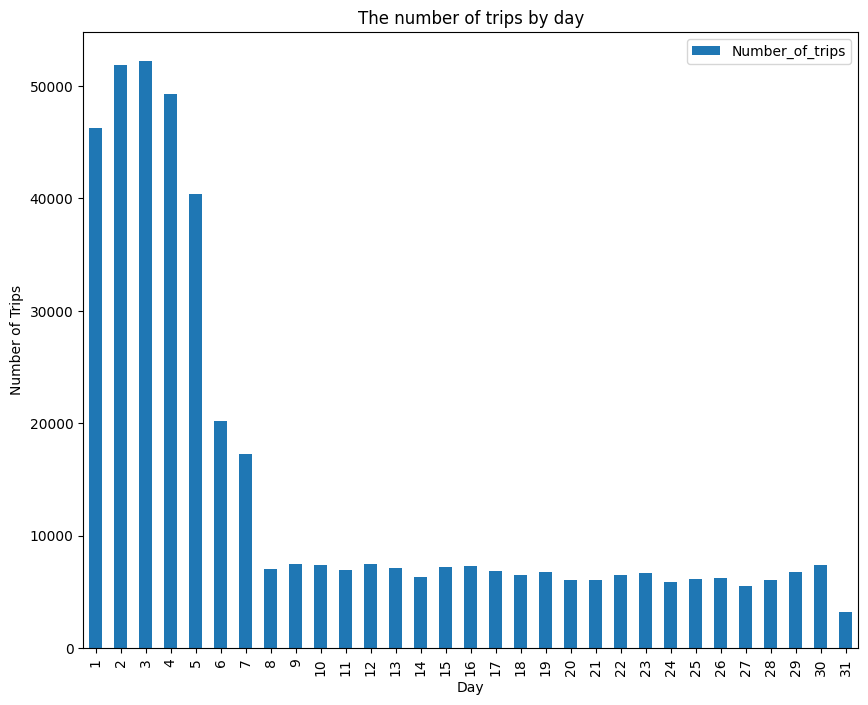

In [25]:
df_day.plot(kind='bar', figsize=(10,8))
plt.ylabel('Number of Trips')
plt.title('The number of trips by day')
plt.show()

### 4.9 Number of trips by hour and month

In [26]:
df_hour_month_grouped = df.groupby(['Hour','Month']).count()
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index) 
df_hour_month.head(10)

Number_of_trips
Hour Month                     
0    April                 1477
     August                1717
     July                  1294
     June                  1313
     May                   1904
     September             1219
1    April                  877
     August                1136
     July                   824
     June                   775

In [27]:
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

,Hour,Month,Number_of_trips
0,0,April,1477
1,0,August,1717
2,0,July,1294
3,0,June,1313
4,0,May,1904


In [28]:
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[1477, 1717, 1294, 1313, 1904, 1219],
       [ 877, 1136,  824,  775, 1097,  672],
       [ 518,  752,  668,  533,  683,  430],
       [ 539,  824,  773,  603,  835,  570],
       [ 694,  827,  731,  753,  941,  804],
       [1082, 1176, 1073, 1300, 1483, 1351],
       [2282, 1889, 1834, 2691, 2799, 2331],
       [3041, 2701, 2823, 3695, 3730, 3076],
       [2622, 2745, 2753, 3427, 3457, 3189],
       [2221, 2565, 2491, 2815, 2729, 2738],
       [2313, 2665, 2527, 2828, 2951, 2776],
       [2486, 2799, 2806, 2817, 3165, 2928],
       [2565, 2860, 3137, 2960, 3382, 3107],
       [2971, 3151, 3569, 3404, 4056, 3402],
       [3443, 3696, 3985, 3967, 4991, 3918],
       [4458, 4222, 4286, 4388, 6343, 4597],
       [5345, 4754, 4454, 5067, 7298, 4990],
       [5437, 5075, 4971, 5212, 7473, 4593],
       [5100, 4745, 5211, 4421, 7210, 4837],
       [4550, 4490, 4814, 3682, 5983, 4364],
       [4127, 4210, 4240, 3750, 5780, 4046],
       [4332, 3889, 4051, 3718, 5607, 3668],
       [36

In [29]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns = df['Month'].unique())
df_hour_month.head()

,April,May,June,July,August,September
0,1477,1717,1294,1313,1904,1219
1,877,1136,824,775,1097,672
2,518,752,668,533,683,430
3,539,824,773,603,835,570
4,694,827,731,753,941,804


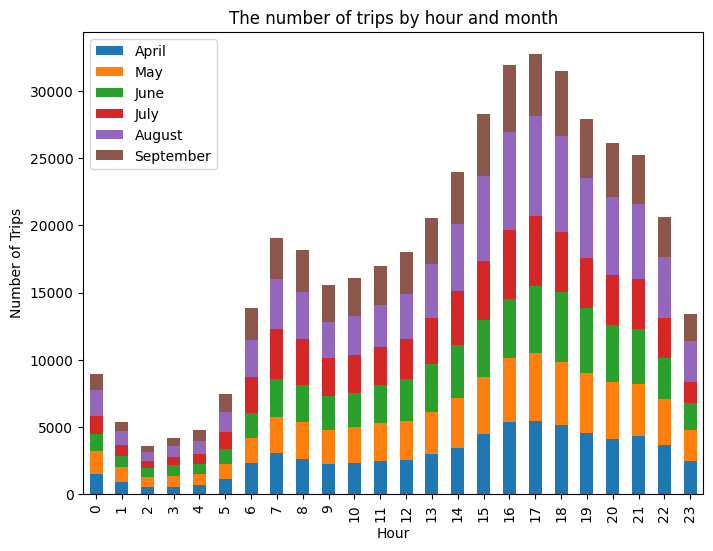

In [30]:
df_hour_month.plot(kind='bar', figsize=(8,6), stacked=True)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('The number of trips by hour and month')
plt.show()

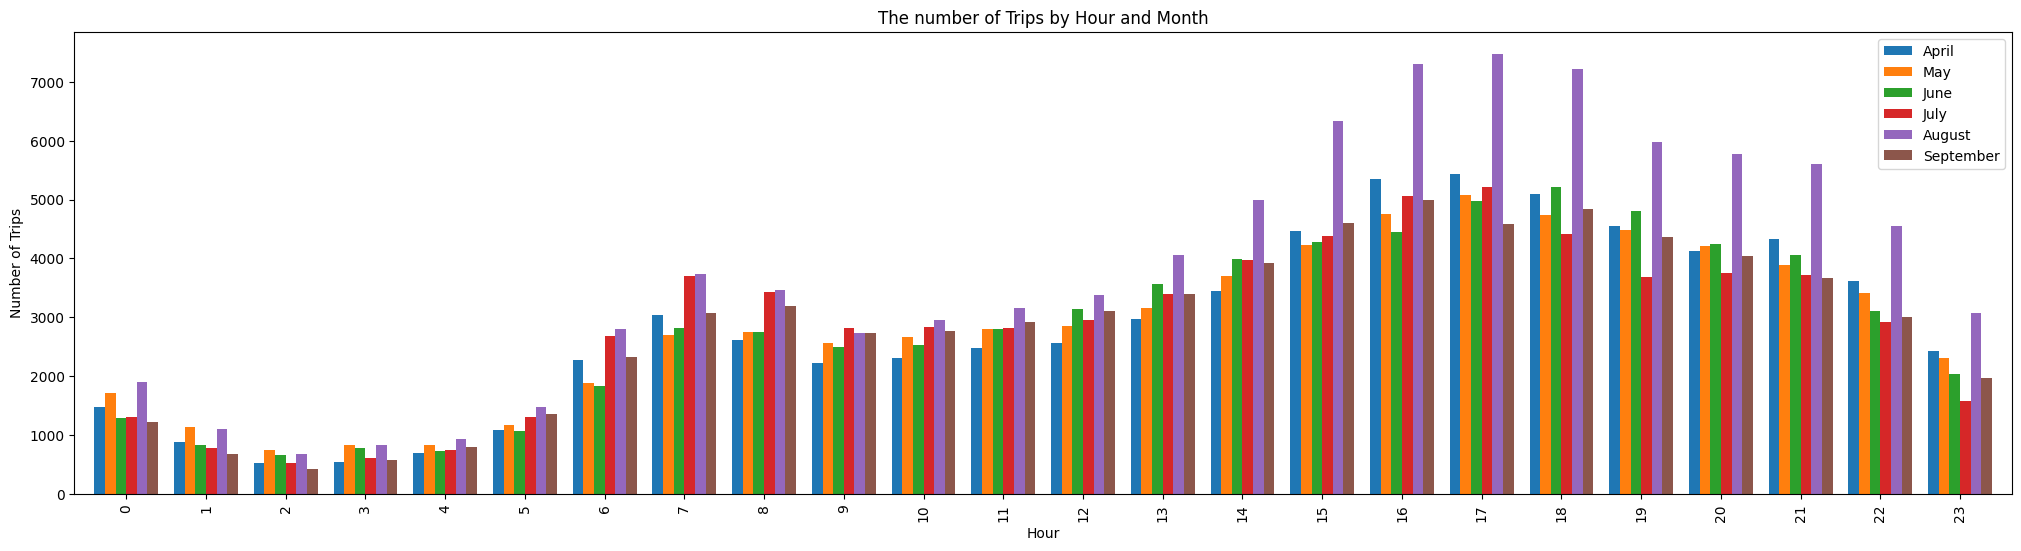

In [31]:
df_hour_month.plot(kind='bar', figsize=(25,6),width=0.8)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('The number of Trips by Hour and Month')
plt.show()

### 4.10 Trips by Hour and Weekday

In [32]:
df_weekday_hour_grouped = df.groupby(['Weekday','Hour'], sort = False).count()
df_weekday_hour = pd.DataFrame({'Number_of_trips':df_weekday_hour_grouped.values[:,1]}, index = df_weekday_hour_grouped.index) 
df_weekday_hour

Number_of_trips
Weekday Hour                 
Tuesday 0                 615
        1                 351
        2                 231
        3                 483
        4                 775
...                       ...
Monday  19               3268
        20               3101
        21               2691
        22               1832
        23               1007

[168 rows x 1 columns]

In [33]:
df_weekday_hour.reset_index(inplace= True)
data_weekday_hour = df_weekday_hour['Number_of_trips'].values.reshape(7,24)
df_weekday_hour = pd.DataFrame(data = data_weekday_hour, index = df_weekday_hour['Weekday'].unique(), columns = df['Hour'].unique())
df_weekday_hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Tuesday,615,351,231,483,775,1385,2791,3920,3506,2644,...,4056,4764,5731,6623,5783,4933,4711,3863,2443,1263
Wednesday,615,345,246,411,644,1180,2637,3690,3210,2496,...,3753,4736,5733,6206,5813,5010,4796,4082,2770,1371
Thursday,841,459,315,536,754,1380,2700,3814,3657,2949,...,3896,4351,4544,4837,5128,4662,4441,4483,3693,2051
Friday,1163,701,494,641,732,1189,2178,2943,2844,2419,...,3917,4549,4749,4605,4839,4249,3662,4135,4276,3350
Saturday,2043,1318,839,632,468,478,606,826,1091,1413,...,2561,3189,3658,3543,4059,3560,3367,3909,4110,3466


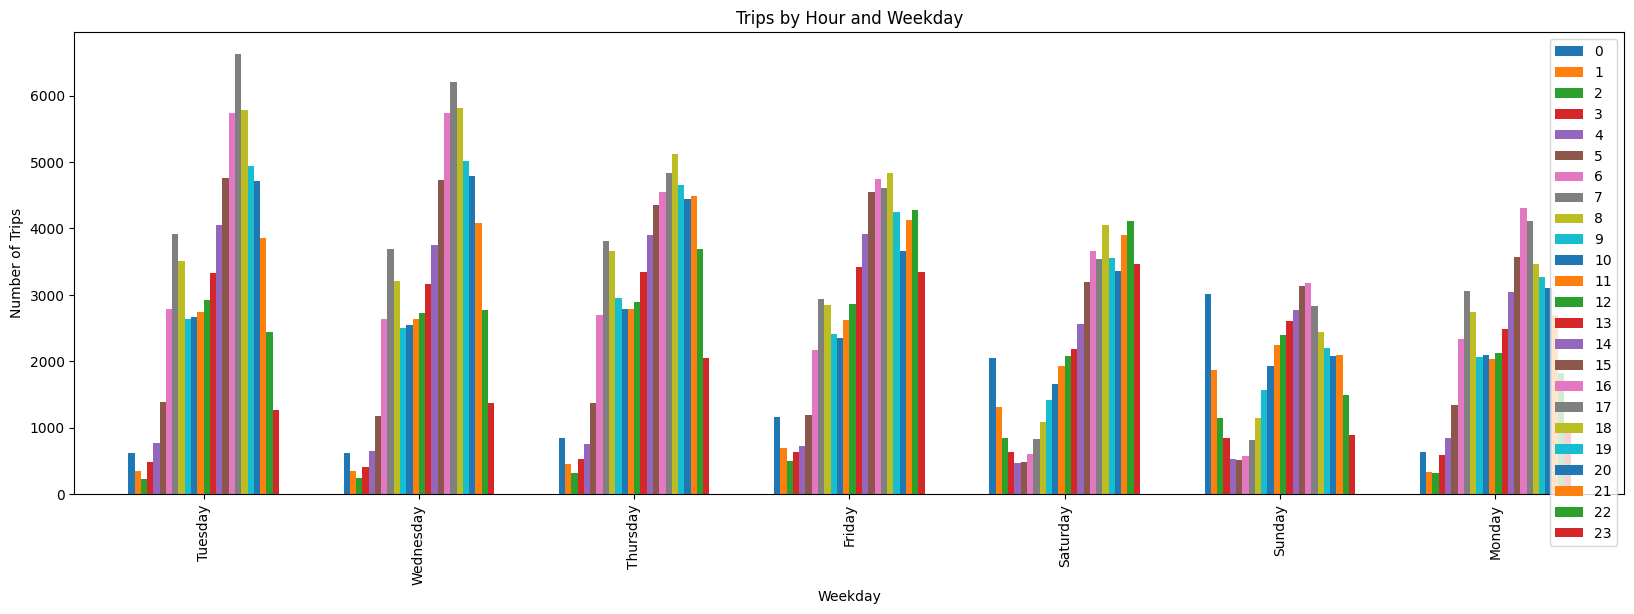

In [34]:
df_weekday_hour.plot(kind='bar', figsize=(20,6), width = 0.7)
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')
plt.show()

In [35]:
df_month_weekday_grouped = df.groupby(['Month','Weekday'], sort=False).count()
df_month_weekday = pd.DataFrame({'Number_of_trips':df_month_weekday_grouped.values[:,1]}, index = df_month_weekday_grouped.index) 
df_month_weekday.head(10)

Number_of_trips
Month Weekday                   
April Tuesday               9609
      Wednesday            11470
      Thursday             10992
      Friday               12703
      Saturday             10173
      Sunday                6894
      Monday                6692
May   Thursday             15986
      Friday               16807
      Saturday             14450

In [36]:
df_month_weekday.reset_index(inplace= True)
data_month_weekday = df_month_weekday['Number_of_trips'].values.reshape(6,7)
df_month_weekday = pd.DataFrame(data = data_month_weekday, index = df_month_weekday['Month'].unique(), columns = df['Weekday'].unique())
df_month_weekday.head()

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
April,9609,11470,10992,12703,10173,6894,6692
May,15986,16807,14450,8570,10791,12247,12663
June,9993,11502,13346,13764,11370,5024,3621
July,13816,15659,13703,8779,6976,5043,4491
August,14926,12657,10307,10553,10946,4516,4709


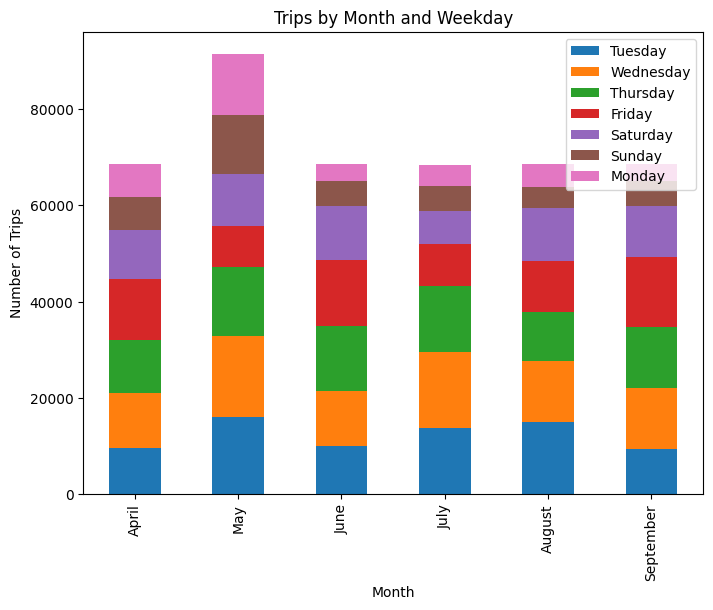

In [37]:
df_month_weekday.plot(kind='bar', figsize=(8,6), stacked = True)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')
plt.show()

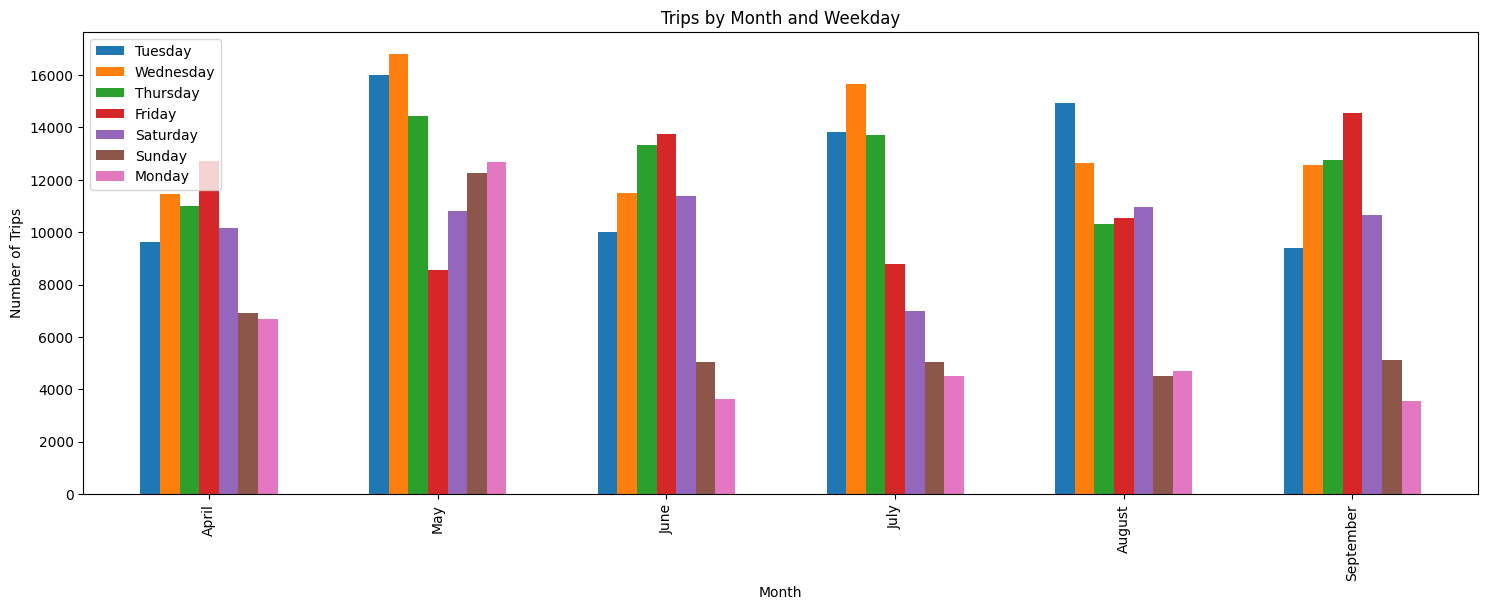

In [38]:
df_month_weekday.plot(kind='bar', figsize=(18,6), width = 0.6)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')
plt.show()